Projeto 1 - Previsão se preços de imóveis usando TensorFlow e Python Pandas

In [0]:
!pip install tensorflow
import tensorflow as tf
tensorflow.__version__
import numpy as np
import pandas as pd
uri = "https://raw.githubusercontent.com/GustavoDuregger/IntroducaoMachineLearningDataScience/master/house-prices.csv"
base = pd.read_csv(uri)


In [9]:
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
base.shape

(21613, 21)

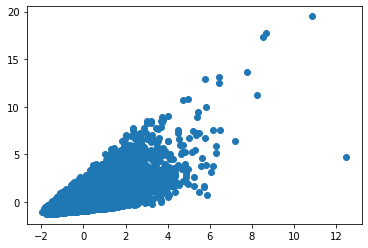

In [11]:
x=base.iloc[:,5].values
x=x.reshape(-1,1)
y = base.iloc[:,2:3].values

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x, y)

In [0]:
#Regressão linear simples
np.random.seed(0)
np.random.rand(2)
b0= tf.Variable(0.41)
b1= tf.Variable(0.72)

In [0]:
batch_size = 32
xph = tf.placeholder(tf.float32,[batch_size,1])
yph = tf.placeholder(tf.float32,[batch_size,1]) 

In [0]:
y_modelo = b0 + b1 * xph
erro = tf.losses.mean_squared_error(yph, y_modelo)
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  for i in range(1000):
    indices = np.random.randint(len(x), size= batch_size)
    feed = {xph: x[indices], yph: y[indices]}
    sess.run(treinamento, feed_dict=feed)
  b0_final, b1_final = sess.run([b0, b1])

In [0]:
previsoes = b0_final + b1_final * x

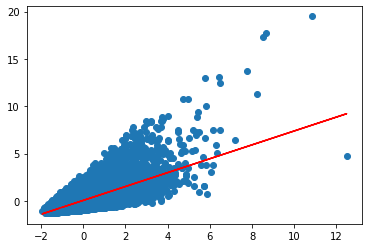

In [17]:
plt.plot(x, y, 'o')
plt.plot(x, previsoes, color ='red')

In [18]:
y1 = scaler_y.inverse_transform(y)
previsoes1 = scaler_y.inverse_transform(previsoes)
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(y1, previsoes1)
mae

178723.6456547512

In [0]:
#Erro muito alto, portando deve-se abordar de outra forma

In [0]:
colunas = [tf.feature_column.numeric_column('x',shape=[1])]
regressor= tf.estimator.LinearRegressor(feature_columns=colunas)

In [0]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y, test_size = 0.3)

In [0]:
funcao_treinamento = tf.estimator.inputs.numpy_input_fn({'x': x_treinamento}, y_treinamento, batch_size=32, num_epochs = None, shuffle = True)

In [0]:
funcao_teste = tf.estimator.inputs.numpy_input_fn({'x': x_teste}, y_teste, batch_size=32, num_epochs = 1000, shuffle = False)

In [0]:
regressor.train(input_fn=funcao_treinamento,steps=10000)

In [0]:
metricas_treinamento = regressor.evaluate(input_fn=funcao_treinamento, steps=10000)

In [0]:
metricas_teste = regressor.evaluate(input_fn= funcao_teste, steps = 10000)

In [26]:
metricas_treinamento

{'average_loss': 0.5196446,
 'global_step': 10000,
 'label/mean': 0.0016797662,
 'loss': 16.628628,
 'prediction/mean': -0.00075639546}

In [27]:
metricas_teste

{'average_loss': 0.47832686,
 'global_step': 10000,
 'label/mean': -0.0037564884,
 'loss': 15.306459,
 'prediction/mean': -0.0141277}

In [28]:
novas_casas = np.array([[800],[900],[1000]])
novas_casas = scaler_x.transform(novas_casas)

funcao_previsao = tf.estimator.inputs.numpy_input_fn({'x': novas_casas}, shuffle = False)
previsoes = regressor.predict(input_fn=funcao_previsao)

for p in regressor.predict(input_fn=funcao_previsao):
  print(scaler_y.inverse_transform(p['predictions']))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp89n0vqfw/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[175255.05]
[203622.14]
[231989.27]


In [0]:
#Utilização de regressão multipla

In [0]:
colunas_usadas = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long']

In [0]:
uri = "https://raw.githubusercontent.com/GustavoDuregger/IntroducaoMachineLearningDataScience/master/house-prices.csv"
base = pd.read_csv(uri, usecols=colunas_usadas)

In [31]:
base.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
base[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long']] = scaler_x.fit_transform(base[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long']])

In [33]:
base.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608
1,538000.0,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113
2,180000.0,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542
3,604000.0,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651
4,510000.0,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688


In [0]:
scaler_y= MinMaxScaler()
base[['price']] = scaler_y.fit_transform(base[['price']])

In [0]:
x= base.drop('price', axis = 1)
y= base.price

In [38]:
previsores_colunas = colunas_usadas[1:17]
previsores_colunas

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long']

In [0]:
colunas = [tf.feature_column.numeric_column(key = c) for c in previsores_colunas]

In [0]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y,test_size = 0.3)

In [0]:
funcao_treinamento1 = tf.estimator.inputs.pandas_input_fn(x = x_treinamento, y = y_treinamento, batch_size=32, num_epochs=None, shuffle=True)

In [45]:
funcao_teste1 =  tf.estimator.inputs.pandas_input_fn(x = x_teste, y = y_teste, batch_size=32, num_epochs=10000, shuffle=False)
regressor = tf.estimator.LinearRegressor(feature_columns=colunas)
regressor.train(input_fn=funcao_treinamento1, steps=10000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpxuggjksq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f39cc1e36d8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done c

In [63]:
metricas_treinamento1= regressor.evaluate(input_fn=funcao_treinamento1, steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-29T16:26:05Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxuggjksq/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1000/10000]
INFO:tensorflow:Evaluation [2000/10000]
INFO:tensorflow:Evaluation [3000/10000]
INFO:tensorflow:Evaluation [4000/10000]
INFO:tensorflow:Evaluation [5000/10000]
INFO:tensorflow:Evaluation [6000/10000]
INFO:tensorflow:Evaluation [7000/10000]
INFO:tensorflow:Evaluation [8000/10000]
INFO:tensorflow:Evaluation [9000/10000]
INFO:tensorflow:Evaluation [10000/10000]
INFO:tensorflow:Finished evaluation at 2020-01-29-16:26:34
INFO:tensorflow:Saving dict for global step 10000: average_loss = 0.0007421829, global_step = 10000, label/mean = 0.0613972, loss = 0.023749853, prediction/mean = 0.06352449
INFO:tensorflow:Saving 'checkpoint_pa

In [64]:
metricas_teste1 = regressor.evaluate(input_fn=funcao_teste1, steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-29T16:26:49Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxuggjksq/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1000/10000]
INFO:tensorflow:Evaluation [2000/10000]
INFO:tensorflow:Evaluation [3000/10000]
INFO:tensorflow:Evaluation [4000/10000]
INFO:tensorflow:Evaluation [5000/10000]
INFO:tensorflow:Evaluation [6000/10000]
INFO:tensorflow:Evaluation [7000/10000]
INFO:tensorflow:Evaluation [8000/10000]
INFO:tensorflow:Evaluation [9000/10000]
INFO:tensorflow:Evaluation [10000/10000]
INFO:tensorflow:Finished evaluation at 2020-01-29-16:27:17
INFO:tensorflow:Saving dict for global step 10000: average_loss = 0.0006215194, global_step = 10000, label/mean = 0.06004046, loss = 0.01988862, prediction/mean = 0.06330149
INFO:tensorflow:Saving 'checkpoint_pa

In [65]:
metricas_treinamento1

{'average_loss': 0.0007421829,
 'global_step': 10000,
 'label/mean': 0.0613972,
 'loss': 0.023749853,
 'prediction/mean': 0.06352449}

In [66]:
metricas_teste1

{'average_loss': 0.0006215194,
 'global_step': 10000,
 'label/mean': 0.06004046,
 'loss': 0.01988862,
 'prediction/mean': 0.06330149}

In [0]:
funcao_previsao1 = tf.estimator.inputs.pandas_input_fn(x= x_teste, shuffle=False)
previsoes1 = regressor.predict(input_fn=funcao_previsao1)

In [68]:
list(previsoes1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxuggjksq/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([0.0376135], dtype=float32)},
 {'predictions': array([0.06751696], dtype=float32)},
 {'predictions': array([0.06814193], dtype=float32)},
 {'predictions': array([0.0209469], dtype=float32)},
 {'predictions': array([0.08023546], dtype=float32)},
 {'predictions': array([0.08758678], dtype=float32)},
 {'predictions': array([0.07664519], dtype=float32)},
 {'predictions': array([0.05142871], dtype=float32)},
 {'predictions': array([0.04605488], dtype=float32)},
 {'predictions': array([0.05082452], dtype=float32)},
 {'predictions': array([0.04701183], dtype=float32)},
 {'predictions': array([0.05060755], dtype=float32)},
 {'predictions': array([0.05732761], dtype=float32)},
 {'predictions': array([0.04334404], dtype=float32)},
 {'predictions': array([0.02375926], dtype=float32)},
 {'predictions': array([0.13153005], dtype=float32)},
 {'predictions': array([0.02735022], dtype=float32)},
 {'predictions': array([0.11340667], dtype=float32)},
 {'predictions': array([0.0533

In [69]:
valores_previsoes1 = []
for p in regressor.predict(input_fn=funcao_previsao1):
  valores_previsoes1.append(p['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxuggjksq/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [70]:
valores_previsoes1 = np.asarray(valores_previsoes1).reshape(-1,1)
valores_previsoes1 = scaler_y.inverse_transform(valores_previsoes1)
valores_previsoes1

array([[ 361802.97],
       [ 589816.8 ],
       [ 594582.2 ],
       ...,
       [ 564011.1 ],
       [ 398131.3 ],
       [1278808.5 ]], dtype=float32)

In [74]:
y_teste2= y_teste.values.reshape(-1,1)
y_teste2= scaler_y.inverse_transform(y_teste2)
y_teste2

array([[ 210000.],
       [ 613000.],
       [ 415000.],
       ...,
       [ 842000.],
       [ 430000.],
       [1695000.]])

In [76]:
mae1 = mean_absolute_error(y_teste2, valores_previsoes1)
mae1

127750.13362534821

In [79]:
diferenca = mae - mae1
diferenca

50973.51202940298

In [0]:
#Abaixamos o erro em $50.973,51